# Beispiel: Lineare Regression nach Transformation mit Logarithmus
Wir verwenden einen Datensatz von Säugetieren und betrachten den Stoffwechsel (BasalMetRate_mLO2hr) in Abhängigkeit von dem Gewicht eines Säugetieres (AdultBodyMass_g). Führen wir "blind" eine Lineaere Regression durch, so erhalten wir (immerhin) ein $R^2$ von ca. 0,6. Der Koeffizient für AdultBodyMass_g hat einen p-Wert < 0,05.

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/troescherw/datasets/master/Saeugetiere.csv")
df

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,AdultBodyMass_g,BasalMetRate_mLO2hr,Met-Gram,MaxLongevity_m
0,Chiroptera,Mormoopidae,Pteronotus,quadridens,Pteronotus quadridens,5.64,6.12,1.085106,*
1,Chiroptera,Vespertilionidae,Myotis,velifer,Myotis velifer,9.82,7.70,0.784114,135.96
2,Afrosoricida,Tenrecidae,Geogale,aurita,Geogale aurita,6.69,7.72,1.153961,*
3,Chiroptera,Mormoopidae,Mormoops,blainvillei,Mormoops blainvillei,8.69,7.99,0.919448,*
4,Chiroptera,Natalidae,Natalus,tumidirostris,Natalus tumidirostris,6.30,8.31,1.319048,*
...,...,...,...,...,...,...,...,...,...
567,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,492714.47,40293.00,0.081778,480
568,Carnivora,Ursidae,Ursus,maritimus,Ursus maritimus,371703.81,44346.00,0.119305,458.4
569,Carnivora,Phocidae,Cystophora,cristata,Cystophora cristata,278896.81,62991.00,0.225858,420
570,Artiodactyla,Cervidae,Capreolus,capreolus,Capreolus capreolus,22502.01,78470.00,3.487244,204


In [2]:
from statsmodels.formula.api import ols

model = ols("BasalMetRate_mLO2hr~AdultBodyMass_g", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BasalMetRate_mLO2hr   R-squared:                       0.573
Model:                             OLS   Adj. R-squared:                  0.572
Method:                  Least Squares   F-statistic:                     764.9
Date:                 Tue, 04 Apr 2023   Prob (F-statistic):          2.05e-107
Time:                         09:11:42   Log-Likelihood:                -5714.3
No. Observations:                  572   AIC:                         1.143e+04
Df Residuals:                      570   BIC:                         1.144e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         626.0711    225.473      2.777      0.006     183.212    1068.930
AdultBodyMass_g     0.1247      0.005     27.658      0.000       0.116       0.134
==============================================================================
Omnibus:                      811.543   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           332623.128
Skew:                           7.177   Prob(JB):                         0.00
Kurtosis:                     120.261   Cond. No.                     5.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ein Scatterplot zeigt allerdings, dass die Daten hier sehr streuen, und zwar zunehmend mit dem Körpergewicht (Heteroskedastizität).

<AxesSubplot:xlabel='AdultBodyMass_g', ylabel='BasalMetRate_mLO2hr'>

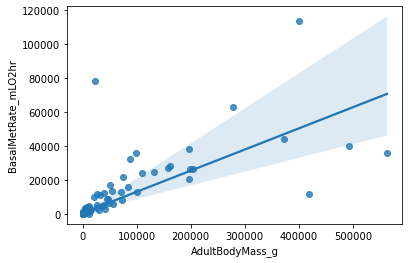

In [4]:
import seaborn as sns
sns.regplot(x=df.AdultBodyMass_g, y=df.BasalMetRate_mLO2hr)

Wir führen eine Log-Transformation durch: Von beiden Features berechnen wir den Logarithmus (zur Basis e). Wir sehen, dass dann ein sehr guter linearer Zusammenhang zwischen den transformierten Daten besteht!

<AxesSubplot:xlabel='AdultBodyMass_g', ylabel='BasalMetRate_mLO2hr'>

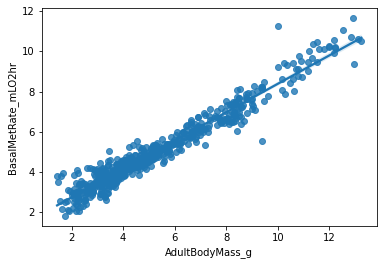

In [5]:
import numpy as np
sns.regplot(x=np.log(df.AdultBodyMass_g), y=np.log(df.BasalMetRate_mLO2hr))

Eine lineare Regression mit den transformiertn Daten ergibt dann sogar ein $R^2$ von ca. 0.94! Ein enorm hoher Wert wenn man bedenkt, dass es sich um die unterschiedlichsten Tiere handelt, deren Daten in den Datensatz eingeflossen sind.

In [6]:
df["BasalMetRate_mLO2hr_log"] = np.log(df.BasalMetRate_mLO2hr)
df["AdultBodyMass_g_log"] = np.log(df.AdultBodyMass_g)
model = ols("BasalMetRate_mLO2hr_log~AdultBodyMass_g_log", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     BasalMetRate_mLO2hr_log   R-squared:                       0.943
Model:                                 OLS   Adj. R-squared:                  0.943
Method:                      Least Squares   F-statistic:                     9440.
Date:                     Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                             09:11:51   Log-Likelihood:                -344.11
No. Observations:                      572   AIC:                             692.2
Df Residuals:                          570   BIC:                             700.9
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3259      0.043     30.876      0.000       1.242       1.410
AdultBodyMass_g_log     0.7063      0.007     97.158      0.000       0.692       0.721
==============================================================================
Omnibus:                       86.538   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.744
Skew:                           0.498   Prob(JB):                    1.12e-109
Kurtosis:                       7.479   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wollen wir eine Prognose durchführen, müssen wir für die unabhängige variable natürlich auch vorher eine Transformation durchführen, ebenso mit dem Ergebnis der Vorhersage:

In [7]:
gewicht = 80000 # Gewicht in Gramm
gewicht_log = np.log(gewicht)
pred = model.predict(pd.DataFrame([{"AdultBodyMass_g_log":gewicht_log}]))
np.exp(pred)

0    10936.404929
dtype: float64

Interessant ist auch die Lebenserwartung in Abhängigkeit vom Stoffwechsel! Tiere (und auch Menschen) mit einem geringeren Stochwechsel haben eine höhere Lebenserwartung. Auch hier führen wir eine Log-Transformation durch:

<AxesSubplot:xlabel='BasalMetRate_mLO2hr_log', ylabel='MaxLongevity_m_log'>

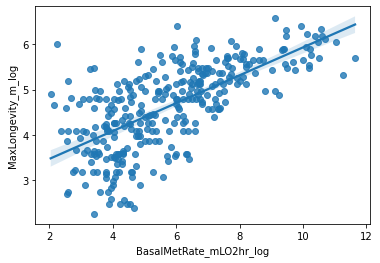

In [9]:
import numpy as np
df = df[df.MaxLongevity_m!="*"]
df["MaxLongevity_m_log"] = np.log(df.MaxLongevity_m.astype(float))
sns.regplot(x=df.BasalMetRate_mLO2hr_log, y=df.MaxLongevity_m_log)


In [10]:
model2 = ols("MaxLongevity_m_log~df.BasalMetRate_mLO2hr_log", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MaxLongevity_m_log   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     265.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           5.32e-44
Time:                        09:12:48   Log-Likelihood:                -341.47
No. Observations:                 325   AIC:                             686.9
Df Residuals:                     323   BIC:                             694.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.8615      0.115     24.855      0.000       2.635       3.088
df.BasalMetRate_mLO2hr_log     0.3071      0.019     16.298      0.000       0.270       0.344
==============================================================================
Omnibus:                        1.534   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.261
Skew:                          -0.110   Prob(JB):                        0.532
Kurtosis:                       3.211   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Immerhin wird die Lebenserwartung zu ca. 45 Prozent vom Stochwechsel erklärt. Auf die Lebenswerwartung haben natürlich noch viele andere Faktoren einen Einfluss.